# Gathering Data Steps 

In [154]:
import matplotlib
import pandas as pd
import numpy as np
import io
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

## first from a CSV file

In [155]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [156]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [157]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [158]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2. Programmatic download from Udacity's server

In [159]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [160]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [161]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [162]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3- from a JSON file that was in a zip file downloaded from udacity 

### twitter API code

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
       for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [163]:
import zipfile

In [164]:
with zipfile.ZipFile('tweet-json.zip', 'r') as myzip:
    myzip.extractall()

In [165]:
tweets_full_df = pd.read_json('tweet-json.txt', lines=True)
tweets_full_df.head()


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [166]:
tweets_df = tweets_full_df[['id', 'favorite_count','retweet_count']]
tweets_df = tweets_df.rename(columns={'id':'tweet_id'})
tweets_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [167]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Asessing Data Steps

## Asessing the CSV file

In [168]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1638,684188786104872960,NaN,NaN,2016-01-05 01:44:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786...,10,10,None,None,None,None,None
171,858860390427611136,NaN,NaN,2017-05-01 01:47:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Winston. He knows he's a l...,8.395493e+17,4.196984e+09,2017-03-08 18:52:12 +0000,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None


In [169]:
twitter_archive_df.name.value_counts()


None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Daisy               7
Toby                7
Buddy               7
Bailey              7
an                  7
Rusty               6
Leo                 6
Scout               6
Stanley             6
Jack                6
Oscar               6
Jax                 6
Koda                6
Dave                6
Bella               6
Milo                6
Alfie               5
                 ... 
Tupawc              1
Mac                 1
Walker              1
Ike                 1
Randall             1
Sweets              1
Tess                1
Ember               1
Rhino               1
Sweet               1
Michelangelope      1
space               1
Naphaniel           1
Tater               1
Thor      

In [170]:
twitter_archive_df.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [171]:
len(twitter_archive_df[twitter_archive_df['rating_denominator'] != 10])

23

In [172]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Asessing the TSV file

In [173]:
df_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
351,672523490734551040,https://pbs.twimg.com/media/CVVIjGbWwAAxkN0.jpg,1,golden_retriever,0.565981,True,chow,0.081212,True,Irish_terrier,0.061596,True
893,699423671849451520,https://pbs.twimg.com/media/CbTaHrRW0AABXmG.jpg,1,pug,0.997860,True,French_bulldog,0.001825,True,bull_mastiff,0.000299,True
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,Norwegian_elkhound,0.138523,True,wombat,0.074217,False
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False


In [174]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [175]:
df_image_predictions.duplicated().sum()

0

In [176]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Asessing the JSON file

In [177]:
tweets_df.sample(5)

,tweet_id,favorite_count,retweet_count
1626,684588130326986752,4489,1592
1589,686606069955735556,2071,607
26,886736880519319552,12306,3443
967,750132105863102464,3990,1440
1978,672975131468300288,1813,1015


In [178]:
tweets_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [179]:
tweets_df.duplicated().sum()

0

In [180]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Asessing Summary 
## Quality Issues 
* tweet id should be a string
* some denominator values are not equal 10
* timestamp should be coverted to datetime data type
* The values in the columns p1_conf, p2_conf and p3_conf should be percentages instead of proportions.
* delete retweets and replys
* drop unneeded columns
* the name column contains None when it should be NULLs
* Unusual names in the name column
* P1, P2, P3 should be categorical 

## Tidiness Issues
* doggo, floofer, pupper and puppo columns should be merged into one column
* All dataframes should be in a single dataframe

## Cleaning Steps

In [181]:
#copy dataframes
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = df_image_predictions.copy()
tweets_clean = tweets_df.copy()

### cleaning the CSV file

### define problem 1: convert tweet_id type to string

### code

In [182]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

### Test Problem 1

In [183]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### define problem 2: delete Retweets and replys 

### code

In [184]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [185]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isnull()]

Test problem 2:

In [186]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(2), object(11

### define problem 3: drop unwanted columns

### code

In [187]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

### Test problem 3

In [188]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


### define problem 4: change timestamp data type:

### code

In [189]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])


### test problem 4

In [190]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### define problem 5: replace all the None entries with NULL

### code

In [191]:
twitter_archive_clean['doggo']=twitter_archive_clean['doggo'].replace('None', np.nan)
twitter_archive_clean['floofer']=twitter_archive_clean['floofer'].replace('None', np.nan)
twitter_archive_clean['pupper']=twitter_archive_clean['pupper'].replace('None', np.nan)
twitter_archive_clean['puppo']=twitter_archive_clean['puppo'].replace('None', np.nan)

### Test problem 5

In [192]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### define problem 6: combine the dog stage columns into one column

### code

In [193]:
dog_stage = []

def dog_type(row):
    if row['doggo'] == 'doggo':
        # add to list
        dog_stage.append('doggo')
    elif row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    elif row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    elif row['puppo'] == 'puppo':
        dog_stage.append('puppo')
    else: 
        dog_stage.append('None')

twitter_archive_clean.apply(dog_type, axis=1)
twitter_archive_clean['stage'] = dog_stage
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('None', np.nan) 

In [194]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### test problem 6

In [195]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 336 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


### define problem 7: adjust denominator values that aren't equal to 10

### code

In [196]:
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] != 10,'rating_denominator'] =10

### test problem 7

In [197]:
twitter_archive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### define problem 8: clean wrong names

### code

In [198]:
def wrong_name(row):
    if row['name'][0].islower() == True:
        return 'None'
    else:
        return row['name']
    
twitter_archive_clean['name'] = twitter_archive_clean.apply(wrong_name, axis = 1)

twitter_archive_clean['name'].replace('None', np.nan, inplace=True)

### test problem 8

In [199]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
stage                 336 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


## cleaning the TSV file

In [200]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### define problem 9: change Tweet_id data type

### code

In [201]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

### test problem 9

In [202]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### define problem 10: change p1, p2 & p3 to Category

### code

In [203]:
image_predictions_clean.p1 = image_predictions_clean.p1.astype('category')
image_predictions_clean.p2 = image_predictions_clean.p2.astype('category')
image_predictions_clean.p3 = image_predictions_clean.p3.astype('category')

### test problem 10

In [204]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


### define problem 11: The values in the columns p1_conf, p2_conf and p3_conf should be percentages 


### code

In [205]:
image_predictions_clean.p1_conf = image_predictions_clean.p1_conf.apply(lambda x: round(x*100, 2))
image_predictions_clean.p2_conf = image_predictions_clean.p2_conf.apply(lambda x: round(x*100, 2))
image_predictions_clean.p3_conf = image_predictions_clean.p3_conf.apply(lambda x: round(x*100, 2))

### test problem 11

In [206]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.51,True,collie,15.67,True,Shetland_sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.68,True,miniature_pinscher,7.42,True,Rhodesian_ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.65,True,malinois,13.86,True,bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.81,True,redbone,36.07,True,miniature_pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


### cleaning the JSON file

### define problem 12: change tweet_id data type

### code

In [207]:
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

### test problem 12

In [208]:
tweets_clean.info

<bound method DataFrame.info of                 tweet_id  favorite_count  retweet_count
0     892420643555336193           39467           8853
1     892177421306343426           33819           6514
2     891815181378084864           25461           4328
3     891689557279858688           42908           8964
4     891327558926688256           41048           9774
5     891087950875897856           20562           3261
6     890971913173991426           12041           2158
7     890729181411237888           56848          16716
8     890609185150312448           28226           4429
9     890240255349198849           32467           7711
10    890006608113172480           31166           7624
11    889880896479866881           28268           5156
12    889665388333682689           38818           8538
13    889638837579907072           27672           4735
14    889531135344209921           15359           2321
15    889278841981685760           25652           5637
16    8889172381

# merging the dataframes using Tweet ids

### define problem 13: all dataframes should be merged into one

### code

In [209]:
df_final = image_predictions_clean.merge(twitter_archive_clean, left_on='tweet_id',right_on='tweet_id',how='inner')
df_final = df_final.merge(tweets_clean,left_on='tweet_id',right_on='tweet_id',how='inner')

### test problem 13

In [218]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null category
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null category
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null category
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
favorite_count        1971

### Store the data into a new CSV file

In [210]:
df_final.to_csv('twitter_archive_master.csv',index=False)

# Visualising Data 

In [211]:
df_final.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
726,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,99.71,False,seat_belt,0.04,False,beagle,...,2016-01-13 04:10:18,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,NaN,2371,577
874,699088579889332224,https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg,1,mousetrap,45.62,False,banded_gecko,25.87,False,common_iguana,...,2016-02-15 04:31:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,NaN,2451,715
1824,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,32.17,True,Labrador_retriever,11.51,True,groenendael,...,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,47844,19196
86,667517642048163840,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,12.52,True,standard_poodle,8.46,True,cocker_spaniel,...,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,NaN,389,203
1513,793271401113350145,https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg,1,Siberian_husky,23.17,True,Eskimo_dog,20.67,True,Pembroke,...,2016-11-01 02:00:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dave. It's his favorite day of the year. ...,https://twitter.com/dog_rates/status/793271401...,12,10,Dave,NaN,9677,2763


In [212]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null category
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null category
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null category
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
favorite_count        1971

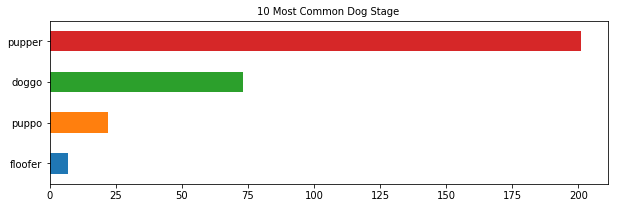

In [213]:
df_dog_breed = df_final[df_final.stage.notnull()]

plt.figure(figsize=(10,3))
plt.title("10 Most Common Dog Stage", size=10)
df_dog_breed['stage'].value_counts()[10::-1].plot(kind='barh',fontsize=10);

##  Insight 1:
* Pupper stage is the most posted stage

(0, 8500)

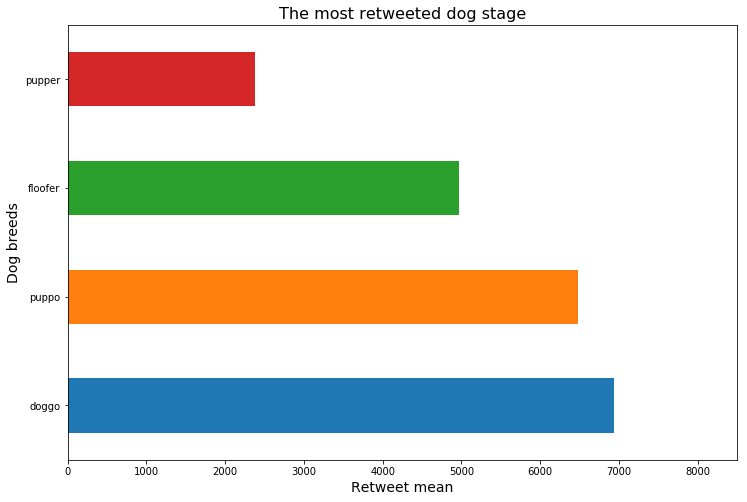

In [214]:
high_retweet = df_final.groupby('stage').retweet_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_retweet.plot(kind='barh', figsize=[12, 8])

plt.title('The most retweeted dog stage', fontsize = 16) 
plt.xlabel('Retweet mean', fontsize = 14)
plt.ylabel('Dog breeds', fontsize = 14)
plt.xlim(0, 8500) 

## Insight 2:
* The Most Retweeted Stage is Doggo

Text(0,0.5,'retweet_count')

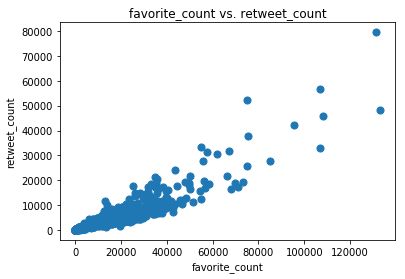

In [215]:
plt.scatter (df_final.favorite_count, df_final.retweet_count, s=50);
plt.title('favorite_count vs. retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

In [216]:
df_final['favorite_count'].corr(df_final['retweet_count'])

0.91301434861074338

## Insight 3:
* the retweets and favorites count are strongly correlated with positive correlation equals 0.91